# Árbol de Decisión

In [ ]:
import pandas as pd

titanic = pd.read_csv("/content/titanic.csv")

titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic["Age"].dropna().count() / len(titanic["Age"])

0.8013468013468014

In [ ]:
titanic["Age"].mean()

29.69911764705882

In [ ]:
titanic["Age"].std()

14.526497332334042

In [ ]:
import numpy as np

def fixAge(age):
  if np.isnan(age):
    new_age = np.random.normal(titanic["Age"].mean(), titanic["Age"].std())
    if new_age <= 0:
      return 0
    if new_age >= 110:
      return 110
    return new_age
  else:
    return age

titanic["Age_FIX"] = titanic["Age"].map(fixAge)

titanic[["Age", "Age_FIX"]].sample(10)

,Age,Age_FIX
149,42.00,42.000000
516,34.00,34.000000
455,29.00,29.000000
22,15.00,15.000000
19,NaN,1.182178
55,NaN,27.553612
586,47.00,47.000000
491,21.00,21.000000
831,0.83,0.830000
32,NaN,32.158441


In [ ]:
titanic["x1"] = (titanic["Sex"] == "male").map({ True: 1, False: 0 })
titanic["x2"] = (titanic["Sex"] == "female").map({ True: 1, False: 0 })
titanic["x3"] = (titanic["Age_FIX"] - titanic["Age_FIX"].mean()) / titanic["Age_FIX"].std()
titanic["x4"] = (titanic["Pclass"] == 1).map({ True: 1, False: 0 })
titanic["x5"] = (titanic["Pclass"] == 2).map({ True: 1, False: 0 })
titanic["x6"] = (titanic["Pclass"] == 3).map({ True: 1, False: 0 })
titanic["x7"] = ((titanic["SibSp"] - titanic["SibSp"].mean()) / titanic["SibSp"].std() > 0).map({ True: 1, False: -1 })

titanic[["x1", "x2", "x3", "x4", "x5", "x6", "x7"]] # 🥳

,x1,x2,x3,x4,x5,x6,x7
0,1,0,-0.514519,0,0,1,1
1,0,1,0.592872,1,0,0,1
2,0,1,-0.237671,0,0,1,-1
3,0,1,0.385236,1,0,0,1
4,1,0,0.385236,0,0,1,-1
...,...,...,...,...,...,...,...
886,1,0,-0.168459,0,1,0,-1
887,0,1,-0.722155,1,0,0,-1
888,0,1,-0.641552,0,0,1,1
889,1,0,-0.237671,1,0,0,-1


In [ ]:
titanic[["x4", "x5", "x6"]].describe()

,x4,x5,x6
count,891.000000,891.000000,891.000000
mean,0.242424,0.206510,0.551066
std,0.428790,0.405028,0.497665
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [ ]:
titanic["y1"] = titanic["Survived"]

titanic[["y1"]]

,y1
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


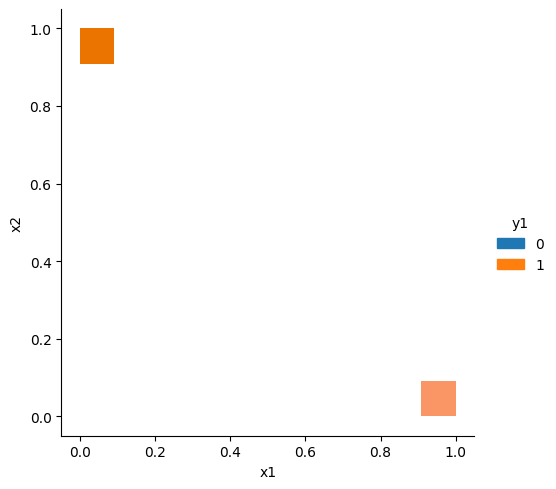

In [ ]:
import seaborn as sns

sns.displot(titanic, x="x1", y="x2", hue="y1")

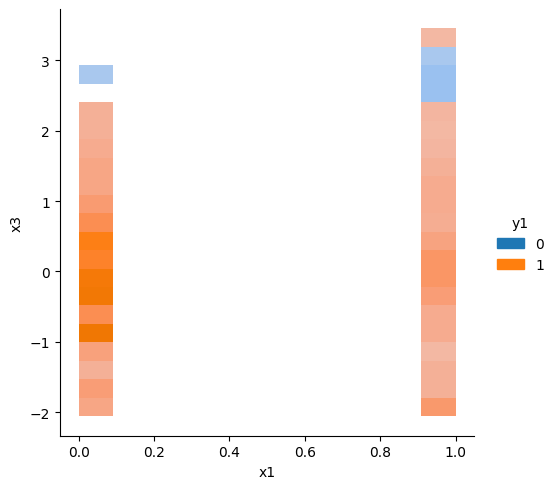

In [ ]:
sns.displot(titanic, x="x1", y="x3", hue="y1")

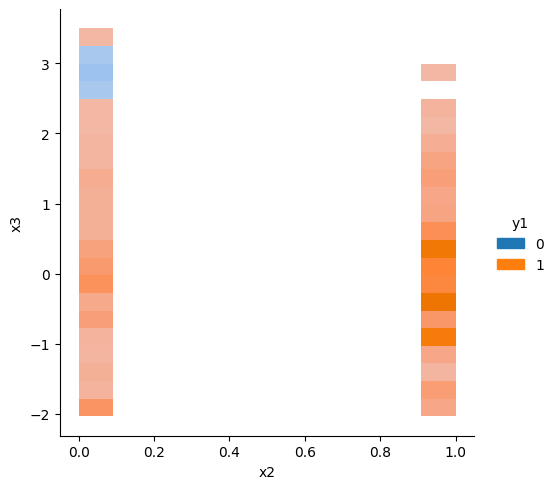

In [ ]:
sns.displot(titanic, x="x2", y="x3", hue="y1")

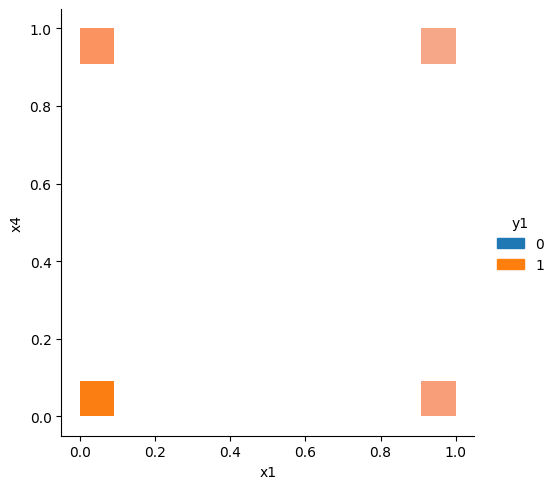

In [ ]:
sns.displot(titanic, x="x1", y="x4", hue="y1")

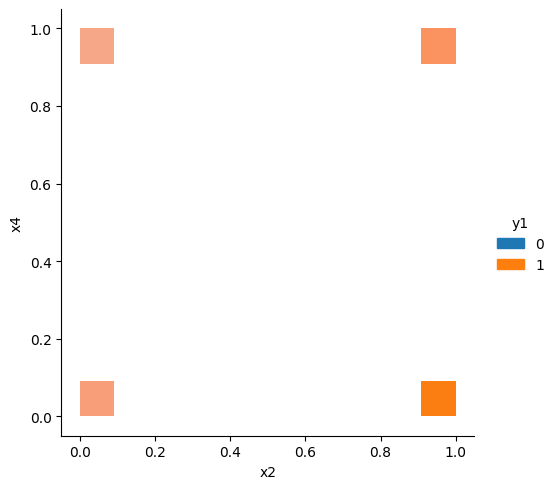

In [ ]:
sns.displot(titanic, x="x2", y="x4", hue="y1")

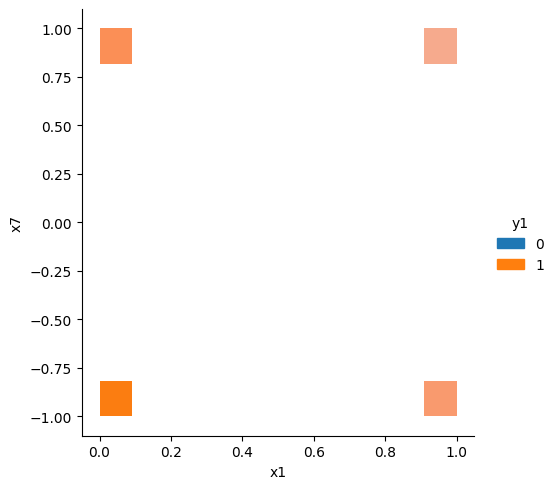

In [ ]:
sns.displot(titanic, x="x1", y="x7", hue="y1")

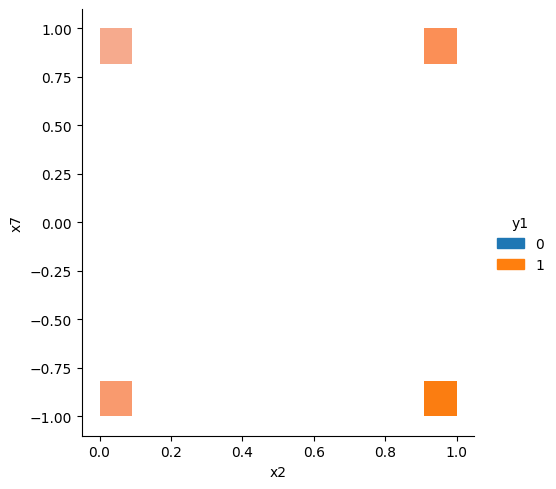

In [ ]:
sns.displot(titanic, x="x2", y="x7", hue="y1")

In [ ]:
X = titanic[["x1", "x2", "x3", "x4", "x5", "x6", "x7"]]

X

,x1,x2,x3,x4,x5,x6,x7
0,1,0,-0.514519,0,0,1,1
1,0,1,0.592872,1,0,0,1
2,0,1,-0.237671,0,0,1,-1
3,0,1,0.385236,1,0,0,1
4,1,0,0.385236,0,0,1,-1
...,...,...,...,...,...,...,...
886,1,0,-0.168459,0,1,0,-1
887,0,1,-0.722155,1,0,0,-1
888,0,1,-0.641552,0,0,1,1
889,1,0,-0.237671,1,0,0,-1


In [ ]:
Y = titanic[["y1"]]

Y

,y1
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X, Y)

clf.score(X, Y)

0.9292929292929293

[Text(0.5673701298701299, 0.9285714285714286, 'x[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.2792207792207792, 0.7857142857142857, 'x[3] <= 0.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.1266233766233766, 0.6428571428571429, 'x[2] <= -1.61\ngini = 0.242\nsamples = 455\nvalue = [391, 64]'),
 Text(0.06493506493506493, 0.5, 'x[4] <= 0.5\ngini = 0.499\nsamples = 29\nvalue = [14, 15]'),
 Text(0.03896103896103896, 0.35714285714285715, 'x[2] <= -1.648\ngini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.025974025974025976, 0.21428571428571427, 'x[6] <= 0.0\ngini = 0.444\nsamples = 18\nvalue = [12, 6]'),
 Text(0.012987012987012988, 0.07142857142857142, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.03896103896103896, 0.07142857142857142, 'gini = 0.426\nsamples = 13\nvalue = [9, 4]'),
 Text(0.05194805194805195, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.09090909090909091, 0.35714285714285715, 'x[6] <= 0.0\ngini = 

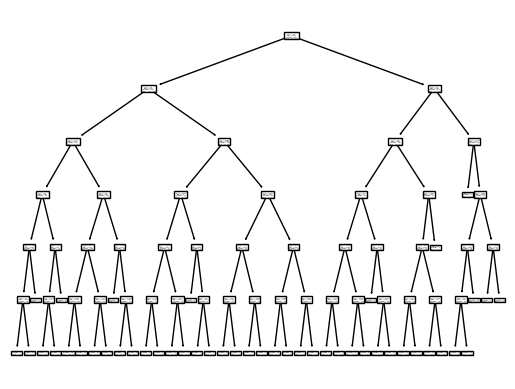

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2, max_features=3)

clf.fit(X, Y)

clf.score(X, Y)

0.7867564534231201

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.5, 'x[3] <= 0.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.242\nsamples = 455\nvalue = [391, 64]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(0.75, 0.5, 'x[5] <= 0.5\ngini = 0.383\nsamples = 314\nvalue = [81, 233]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.1\nsamples = 170\nvalue = [9, 161]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.5\nsamples = 144\nvalue = [72, 72]')]

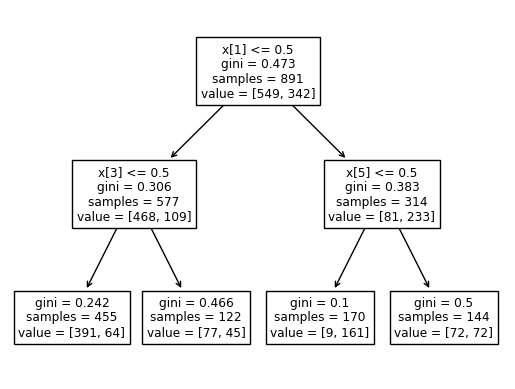

In [ ]:
plot_tree(clf)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, max_features=4)

clf.fit(X, Y)

clf.score(X, Y)

0.8170594837261503

[Text(0.5446428571428571, 0.9, 'x[3] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.2857142857142857, 0.7, 'x[4] <= 0.5\ngini = 0.424\nsamples = 675\nvalue = [469, 206]'),
 Text(0.14285714285714285, 0.5, 'x[0] <= 0.5\ngini = 0.367\nsamples = 491\nvalue = [372, 119]'),
 Text(0.07142857142857142, 0.3, 'x[2] <= 1.51\ngini = 0.5\nsamples = 144\nvalue = [72, 72]'),
 Text(0.03571428571428571, 0.1, 'gini = 0.5\nsamples = 140\nvalue = [72, 68]'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.21428571428571427, 0.3, 'x[2] <= -1.61\ngini = 0.234\nsamples = 347\nvalue = [300, 47]'),
 Text(0.17857142857142858, 0.1, 'gini = 0.465\nsamples = 19\nvalue = [12, 7]'),
 Text(0.25, 0.1, 'gini = 0.214\nsamples = 328\nvalue = [288, 40]'),
 Text(0.42857142857142855, 0.5, 'x[0] <= 0.5\ngini = 0.499\nsamples = 184\nvalue = [97, 87]'),
 Text(0.35714285714285715, 0.3, 'x[2] <= 1.839\ngini = 0.145\nsamples = 76\nvalue = [6, 70]'),
 Text(0.32142857142857145

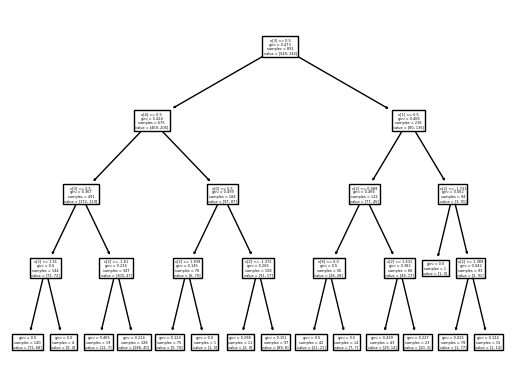

In [ ]:
plot_tree(clf)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

In [ ]:
X_train

,x1,x2,x3,x4,x5,x6,x7
148,1,0,0.489054,0,1,0,-1
242,1,0,-0.030035,0,1,0,-1
191,1,0,-0.722155,0,1,0,-1
460,1,0,1.284992,1,0,0,-1
104,1,0,0.523660,0,0,1,1
...,...,...,...,...,...,...,...
545,1,0,2.392383,1,0,0,-1
11,0,1,1.977111,1,0,0,-1
419,0,1,-1.345062,0,0,1,-1
870,1,0,-0.237671,0,0,1,-1


In [ ]:
X_test

,x1,x2,x3,x4,x5,x6,x7
696,1,0,1.008144,0,0,1,-1
396,0,1,0.108389,0,0,1,-1
142,0,1,-0.376095,0,0,1,1
71,0,1,-0.929790,0,0,1,1
474,0,1,-0.514519,0,0,1,-1
...,...,...,...,...,...,...,...
220,1,0,-0.929790,0,0,1,-1
488,1,0,0.039177,0,0,1,-1
583,1,0,0.454448,1,0,0,-1
410,1,0,-0.093798,0,0,1,-1


In [ ]:
y_train

,y1
148,0
242,0
191,0
460,1
104,0
...,...
545,0
11,1
419,0
870,0


In [ ]:
y_test

,y1
696,0
396,0
142,1
71,0
474,0
...,...
220,1
488,0
583,0
410,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.7111111111111111

In [ ]:
clf.predict([
    # Edad media
    [0, 1, 0, 1, 0, 0, 1],  # V
    [0, 1, 0, 1, 0, 0, -1], # V
    [0, 1, 0, 0, 1, 0, 1],  # V
    [0, 1, 0, 0, 1, 0, -1], # V
    [0, 1, 0, 0, 0, 1, 1],  # M
    [0, 1, 0, 0, 0, 1, -1], # M
    [1, 0, 0, 1, 0, 0, 1],  # M
    [1, 0, 0, 1, 0, 0, -1], # M
    [1, 0, 0, 0, 1, 0, 1],  # M
    [1, 0, 0, 0, 1, 0, -1], # M
    [1, 0, 0, 0, 0, 1, 1],  # M
    [1, 0, 0, 0, 0, 1, -1], # M
])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
clf.predict([
    # Edad alta
    [0, 1, 2, 1, 0, 0, 1],  # V
    [0, 1, 2, 1, 0, 0, -1], # V
    [0, 1, 2, 0, 1, 0, 1],  # V
    [0, 1, 2, 0, 1, 0, -1], # V
    [0, 1, 2, 0, 0, 1, 1],  # V
    [0, 1, 2, 0, 0, 1, -1], # V
    [1, 0, 2, 1, 0, 0, 1],  # V
    [1, 0, 2, 1, 0, 0, -1], # M
    [1, 0, 2, 0, 1, 0, 1],  # M
    [1, 0, 2, 0, 1, 0, -1], # M
    [1, 0, 2, 0, 0, 1, 1],  # M
    [1, 0, 2, 0, 0, 1, -1], # M
])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

# Práctica 301 - Análisis del IRIS con Árboles de Decisión

> Paso 1. Cargar los datos del `iris.csv` en *dataframe*

([https://github.com/dragonnomada/datascience-intermediate-cenace-2024/blob/main/datasets/iris.csv](https://github.com/dragonnomada/datascience-intermediate-cenace-2024/blob/main/datasets/iris.csv)

> Paso 2. Inspeccionar las columnas

`Sepal Width`

`Sepal Length`

`Petal Width`

`Petal Length`

`Variety`

> Paso 3. Construir las características

$x_1 = \overline{Sepal_{Length}}$

$x_2 = \overline{Sepal_{Width}}$

$x_3 = \overline{Petal_{Length}}$

$x_4 = \overline{Petal_{Width}}$

    Nota: Intenta Normalizar los datos

> Paso 4. Construir los objetivos

$y_1 = Veriety ≡ Setosa $

$y_2 = Veriety ≡ Versicolor$

$y_3 = Veriety ≡ Virginica$

> Paso 5. Recuperar la Matriz $X$ de características

$X = [x1 | x2 | x3 | x4]$

> Paso 6. Recuperar la Matriz $Y$ de objetivos

$Y = [y1 | y2 | y3 ]$

> Paso 7. Crear un clasificador por árboles de decisión

```py
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
```

> Paso 7. Ajustar el clasificador a las Matrices $X, Y$

```py
clf.fit(X, Y)
```

> Paso 8. Evaluar el desempeño del clasificador

```py
clf.score(X, Y)
```

> Paso 9. Mostrar el árbol de decisión del clasificador

```py
from sklearn.tree import plot_tree

plot_tree(clf)
```

> Paso 10. Partir los datos de entrenamiento, para mostrar un desempeño más realista

```py
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)
```

